# CSCI 5622: Machine Learning
## Fall 2023
### Instructor: Daniel Acuna, Associate Professor, Department of Computer Science, University of Colorado at Boulder

Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Luk Letif"
COLLABORATORS = ""

---

# Homework 4 (80 pts)

For this homework, we will use the following dataset:

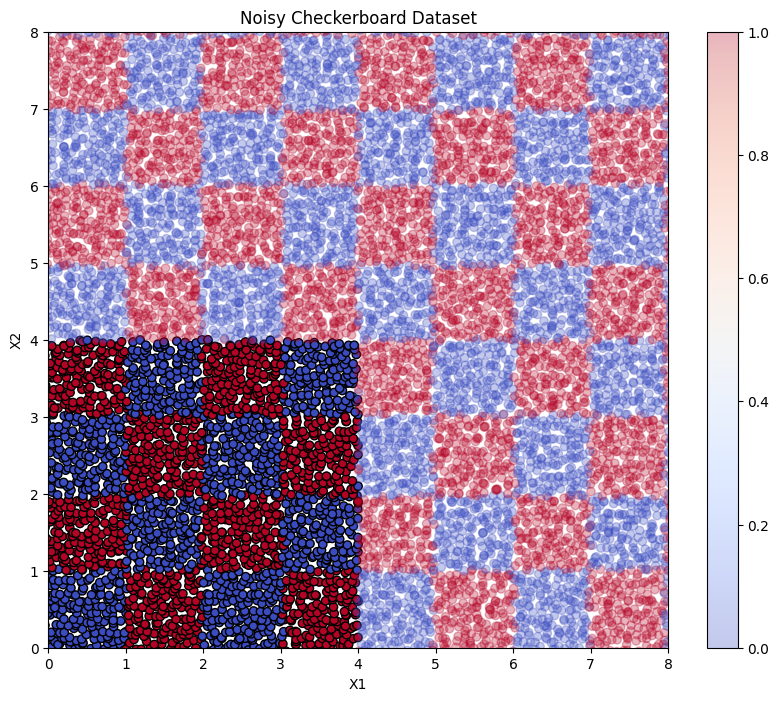

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def generate_checkerboard(n, noise=0.1):
    # Generate a checkerboard pattern
    x, y = np.meshgrid(np.linspace(0, 8, n), np.linspace(0, 8, n))
    z = (x.astype(int) + y.astype(int)) % 2
    
    # Add some noise
    noise_x = (np.random.rand(n, n) - 0.5) * noise
    noise_y = (np.random.rand(n, n) - 0.5) * noise
    x += noise_x
    y += noise_y
    
    # Flatten and stack
    data = np.vstack([x.ravel(), y.ravel()]).T
    labels = z.ravel()
    
    # Split data into training and testing
    mask = (data[:, 0] <= 4) & (data[:, 1] <= 4)
    train_data = data[mask]
    train_labels = labels[mask]
    test_data = data[~mask]
    test_labels = labels[~mask]
    
    return train_data, train_labels, test_data, test_labels

# Generate the data
train_data, train_labels, test_data, test_labels = generate_checkerboard(100)

# Splitting the training data further into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_data, train_labels, test_size=0.2, random_state=42, shuffle=True)

# Plotting the data to visualize
plt.figure(figsize=(10, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap="coolwarm", edgecolors='k')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap="coolwarm", alpha=0.3)
plt.title("Noisy Checkerboard Dataset")
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

### Question 1 [10 points]:

The provided code generates a noisy checkerboard dataset that represents a chess board, with coordinates $x1$ and $x2$ ranging from 0 to 8. The dataset is split into training data (from 0 to 4 for both $x1$ and $x2$) and testing data.

Your task is to:

1. Implement a Linear Support Vector Machine (SVM) classifier using scikit-learn.
2. Train the classifier on the training data.
3. Predict the labels for the testing data.
4. Calculate and report the accuracy of the classifier on the testing data.

In [3]:
# 5 pts
# Implementing the SVM Classifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# YOUR CODE HERE
# raise NotImplementedError()

# 1. Implement a Linear Support Vector Machine (SVM) classifier using scikit-learn. 
svm_classifier = SVC(kernel='linear')

# 2. Train the classifier on the training data.
svm_classifier.fit(X_train, y_train)

# 3. Predict the labels for the testing data.
y_pred = svm_classifier.predict(test_data)

# 4. Calculate and report the accuracy of the classifier on the testing data.
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy of the classifier on the testing data:", accuracy)

Accuracy of the classifier on the testing data: 0.4992669598827136


**Q1.2 (5 pts)** Is the accuracy low or high? Why?

It is low, it basically lower than fliping a coin. 

## Question 2 [10 points]:

Using the Linear Support Vector Machine (SVM) classifier you implemented in Question 1, visualize the support vectors of the classifier on top of the training and testing data. Draw the support vectors with a green circle.

In [4]:
# plt.figure(figsize=(10, 8))
# plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap="coolwarm", edgecolors='k')
# plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap="coolwarm", alpha=0.3)
# plt.title("Noisy Checkerboard Dataset")
# plt.colorbar()
# plt.xlabel("X1")
# plt.ylabel("X2")
# plt.xlim(0, 8)
# plt.ylim(0, 8)
# plt.show()

In [5]:
# train_labels

/var/folders/mb/x6r_gys57j16cvh08t3gckjw0000gq/T/ipykernel_88808/771450617.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='green', cmap="coolwarm", edgecolors='k') # c='green'?


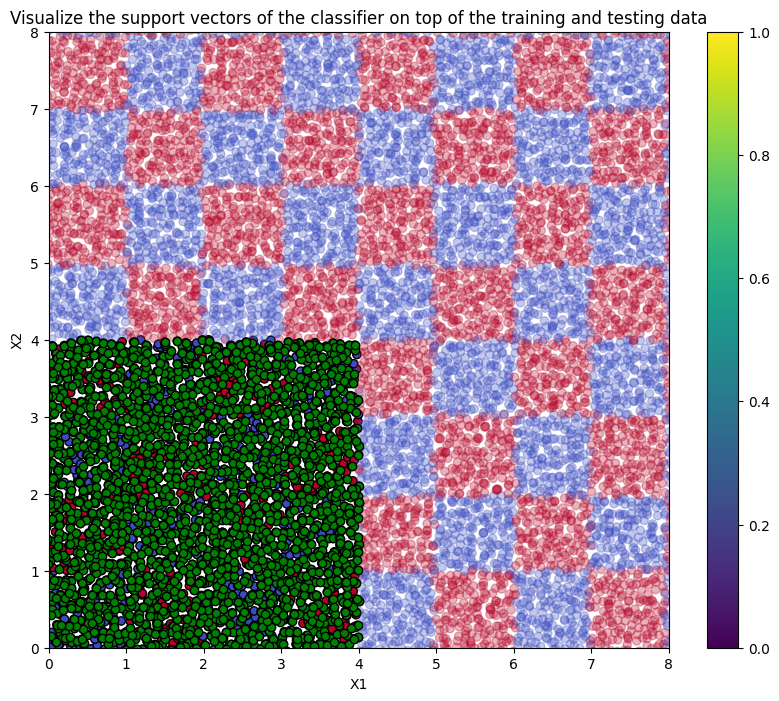

In [6]:
# 10 pts
# YOUR CODE HERE
# raise NotImplementedError()
# support vectors TODO: 
support_vectors = svm_classifier.support_vectors_

# Plot the data points
plt.figure(figsize=(10, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap="coolwarm", edgecolors='k')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap="coolwarm", alpha=0.3)
plt.title("Visualize the support vectors of the classifier on top of the training and testing data")
# Draw the support vectors with a green circle
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='green', cmap="coolwarm", edgecolors='k') # c='green'?
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

### Question 3 [20 points]:

The Support Vector Machine (SVM) classifier offers various kernel functions that can be used to transform the input data into higher-dimensional space. In this question, you are required to:

1. Systematically explore all the kernel functions available for the `SVC` object in scikit-learn: `'linear'`, `'poly'`, `'rbf'`, and `'sigmoid'`.
2. For each kernel, train the SVM classifier and compute its validation performance.
3. Identify and report the kernel that gives the best validation performance.
4. For the best performing model, visualize the predictions on the test dataset
5. For the best model, visualize the support vectors on the noisy checkerboard dataset.

linear kernel accuracy of the classifier on the validation data: 0.496
poly kernel accuracy of the classifier on the validation data: 0.568
rbf kernel accuracy of the classifier on the validation data: 0.694
sigmoid kernel accuracy of the classifier on the validation data: 0.478


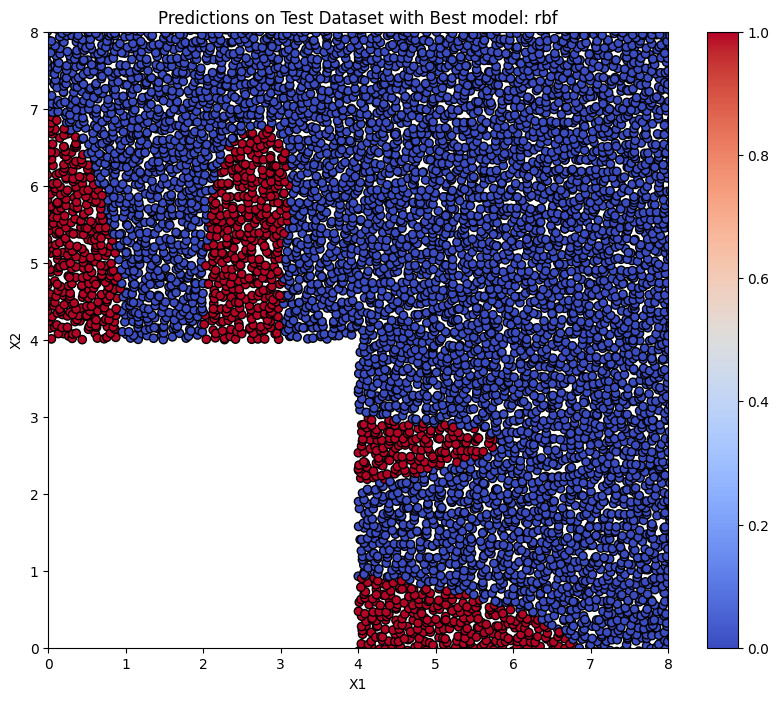

/var/folders/mb/x6r_gys57j16cvh08t3gckjw0000gq/T/ipykernel_88808/3794097892.py:47: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='green', cmap="coolwarm", edgecolors='k') # c='green'


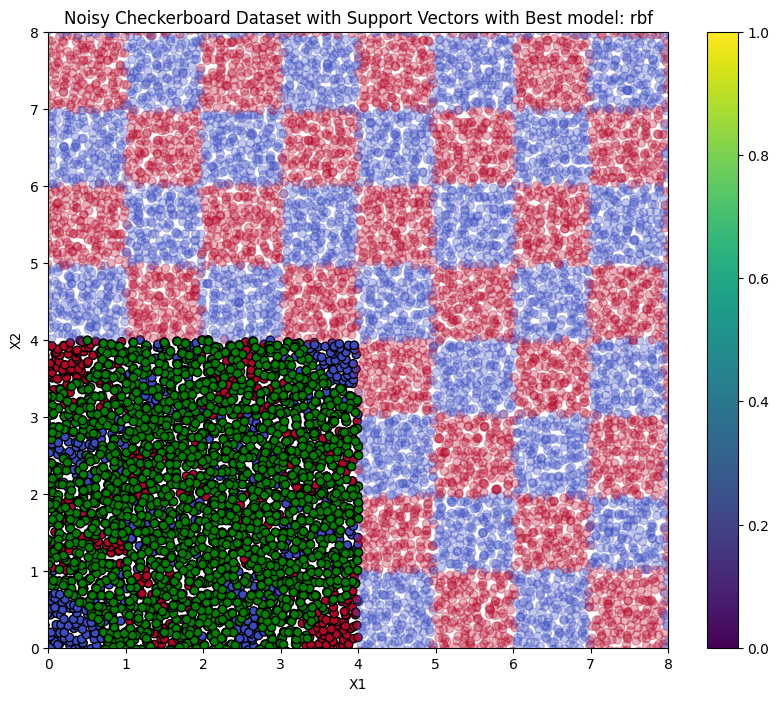

In [7]:
# 15 pts
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
best_accuracy = 0.0
best_kernel = None
best_model = None

# YOUR CODE HERE
# raise NotImplementedError()
# For each kernel, train the SVM classifier and compute its validation performance.
for kernel in kernels:
    # Create an instance of the SVM classifier with the current kernel
    svm_classifier = SVC(kernel=kernel)
    
    # For each kernel, train the SVM classifier 
    svm_classifier.fit(X_train, y_train)
    
    # For each kernel, compute its validation performance
    y_val_pred = svm_classifier.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"{kernel} kernel accuracy of the classifier on the validation data: {accuracy}")
    
    # Identify and report the kernel that gives the best validation performance.
    if accuracy >= best_accuracy:
        best_accuracy = accuracy
        best_kernel = kernel
        best_model = svm_classifier
        
# For the best performing model, visualize the predictions on the test dataset
y_test_pred = best_model.predict(test_data)
plt.figure(figsize=(10, 8))
# plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap="coolwarm", edgecolors='k')
plt.scatter(test_data[:, 0], test_data[:, 1], c=y_test_pred, cmap="coolwarm", edgecolors='k')
plt.title(f"Predictions on Test Dataset with Best model: {best_kernel}")
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

# For the best model, visualize the support vectors on the noisy checkerboard dataset.
support_vectors = best_model.support_vectors_ #TODO:
plt.figure(figsize=(10, 8))
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, cmap="coolwarm", edgecolors='k')
plt.scatter(test_data[:, 0], test_data[:, 1], c=test_labels, cmap="coolwarm", alpha=0.3)
# plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='green', cmap="coolwarm", edgecolors='k') # c='green'
plt.scatter(support_vectors[:, 0], support_vectors[:, 1], c='green', cmap="coolwarm", edgecolors='k') # c='green'
plt.title(f"Noisy Checkerboard Dataset with Support Vectors with Best model: {best_kernel}")
plt.colorbar()
plt.xlabel("X1")
plt.ylabel("X2")
plt.xlim(0, 8)
plt.ylim(0, 8)
plt.show()

**Q3.2 (5 pts)** Why does the testing prediction have the shape that it does? how does it related to the kernel used?

It it 'radiant', due the the funcional nature of radial basis function, which can map the linear space to non-linear.

### Question 4 [15 points]:

Feature engineering plays a crucial role in enhancing the performance of machine learning models, especially for complex patterns like the noisy checkerboard dataset. Your task is to devise a feature transformation that makes the checkerboard problem linearly separable for a Logistic Regression model.

**Hint**: Reflect on the periodic nature of the checkerboard pattern. Can you utilize trigonometric functions, specifically the sine function, to create a new feature or transform the existing features in such a way that the problem becomes linearly separable? **You should expect to achieve more than 90% accuracy on validation.**

Implement a function named `transform_features`.

```python
def transform_features(data: np.ndarray) -> np.ndarray:
    """
    Transforms the original data to capture the periodic nature of the checkerboard pattern.
    
    Parameters:
    - data (np.ndarray): A 2D numpy array where each row is a data point and each column is a feature (x1 and x2).
    
    Returns:
    - np.ndarray: A 2D numpy array containing the transformed data.
    """
    pass
```

After implementing the function:

1. Apply the `transform_features` function to the training data.
2. Train a Logistic Regression model on the transformed data.
3. Report the accuracy on the validation set.

In [8]:
from sklearn.linear_model import LogisticRegression

# YOUR CODE HERE
# raise NotImplementedError()Z

def transform_features(data: np.ndarray) -> np.ndarray:
    """
    Transforms the original data to capture the periodic nature of the checkerboard pattern.
    
    Parameters:
    - data (np.ndarray): A 2D numpy array where each row is a data point and each column is a feature (x1 and x2).
    
    Returns:
    - np.ndarray: A 2D numpy array containing the transformed data.
    """
    transformed_data = np.sin(data)  # cos(data)
    transformed_data = transformed_data.sum(
        axis=1, 
        keepdims=True # need to keep 
    )  
    return transformed_data

# 1. Apply the transform_features function to the training data.
transformed_train_data = transform_features(X_train)

# 2. Train a Logistic Regression model on the transformed data.
logistic_regression = LogisticRegression() #TODO:
logistic_regression.fit(transformed_train_data, y_train)

#TOO: Need to Apply the feature transformation to the validation data
transformed_val_data = transform_features(X_val)


# Report the accuracy on the validation set.
y_val_pred = logistic_regression.predict(transformed_val_data) # TODO: Predict the labels.  usung val_data
accuracy = accuracy_score(y_val, y_val_pred)
print(f"Accuracy on the validation set: {accuracy:.2f}")

Accuracy on the validation set: 0.49


In [9]:
# 15 points
# Test 1: Check the return type
assert isinstance(transform_features(X_train), np.ndarray), "The function should return a numpy ndarray."

# Test 2: Check the shape of the returned data
assert transform_features(X_train).shape[0] == X_train.shape[0], "The number of rows in the transformed data should match the original data."
assert transform_features(X_train).shape[1] == 1, "The function should return a transformed data with only one feature."

# Test 3: Check for non-constant values (i.e., the transformation isn't just returning zeros or a constant)
unique_values = np.unique(transform_features(X_train))
assert len(unique_values) > 1, "The transformed data should have more than one unique value."


### Question 5 [20 points]:

Neural networks, especially multi-layer perceptrons (MLPs), have the ability to automatically learn features from data, making them powerful tools for complex patterns like the noisy checkerboard dataset. In this question, you'll explore this capability.

Your tasks are:

1. Implement and train three different MLP architectures to classify the checkerboard pattern:
   - An MLP with 1 hidden layer.
   - An MLP with 2 hidden layers.
   - An MLP with 3 hidden layers.
   
   For each hidden layer, you can use no more than 10 neurons. Feel free to experiment with different numbers of neurons within this limit for each layer. Make sure to set the maximum number of iterations to at least 3000 (parameter `max_iter`)

2. For each of the three architectures, compute its performance on the validation set.

3. Identify the best-performing model among the three based on validation performance.

4. Visualize the predictions of the best-performing model on the test dataset. You should use a scatter plot where the colors of the points represent the predicted classes.

**Note**: Ensure that the input features to the neural network are the original $ x1 $ and $x2 $ without any manual feature engineering.

In [10]:
# best_accuracy = 0.0
# best_kernel = None
# best_model = None
# if accuracy >= best_accuracy:
#     best_accuracy = accuracy
#     best_kernel = kernel
#     best_model = svm_classifier

The best-performing model: An MLP with 3 Hidden Layers with Validation Accuracy: 0.77


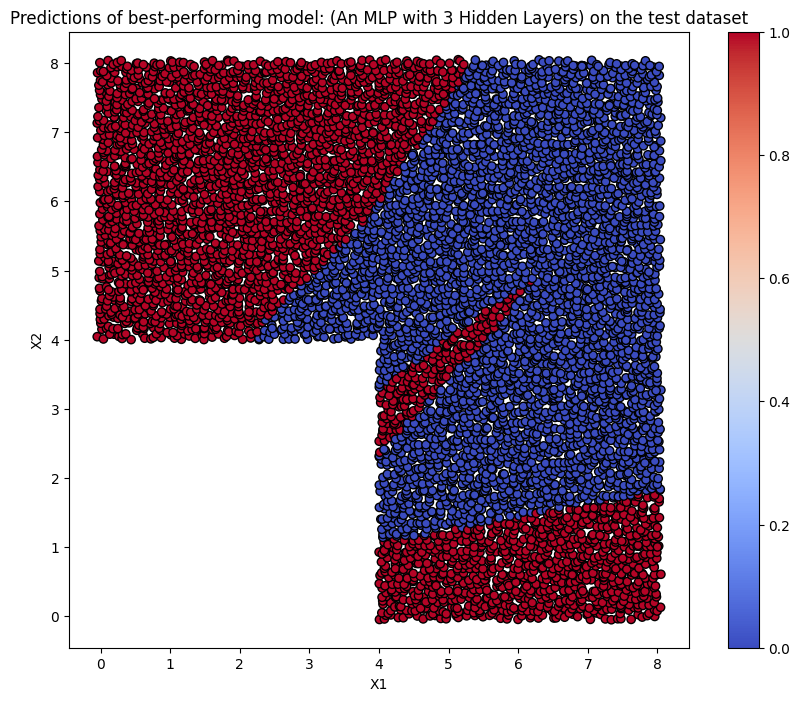

In [11]:
# 15 pts
from sklearn.neural_network import MLPClassifier

# YOUR CODE HERE
# raise NotImplementedError()
# 1. Implement and train three different MLP architectures to classify the checkerboard pattern:
# An MLP with 1 hidden layer.
mlp_1_layer = MLPClassifier(hidden_layer_sizes=(10,), max_iter=3000, random_state=42)
mlp_1_layer.fit(X_train, y_train)
# An MLP with 2 hidden layer.
mlp_2_layers = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=3000, random_state=42)
mlp_2_layers.fit(X_train, y_train)
# An MLP with 3 hidden layer.
mlp_3_layers = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=3000, random_state=42)
mlp_3_layers.fit(X_train, y_train)

# 2. For each of the three architectures, compute its performance on the validation set.
y_val_pred_1_layer = mlp_1_layer.predict(X_val)
accuracy_1_layer = accuracy_score(y_val, y_val_pred_1_layer)

y_val_pred_2_layers = mlp_2_layers.predict(X_val)
accuracy_2_layers = accuracy_score(y_val, y_val_pred_2_layers)

y_val_pred_3_layers = mlp_3_layers.predict(X_val)
accuracy_3_layers = accuracy_score(y_val, y_val_pred_3_layers)

# 3. Identify the best-performing model among the three based on validation performance.
best_accuracy = 0.0
best_kernel = None 
best_model = None

#TODO: loop
if accuracy_1_layer >= best_accuracy:
    best_accuracy = accuracy_1_layer
    best_kernel = "An MLP with 1 Hidden Layer"
    best_model = mlp_1_layer
    
if accuracy_2_layers >= best_accuracy:
    best_accuracy = accuracy_2_layers
    best_kernel = "An MLP with 2 Hidden Layers"
    best_model = mlp_2_layers
    
if accuracy_3_layers >= best_accuracy:
    best_accuracy = accuracy_3_layers
    best_kernel = "An MLP with 3 Hidden Layers"
    best_model = mlp_3_layers
    
print(f"The best-performing model: {best_kernel} with Validation Accuracy: {best_accuracy:.2f}")

# 4. Visualize the predictions of the best-performing model on the test dataset
y_test_pred = best_model.predict(test_data)
plt.figure(figsize=(10, 8))
plt.scatter(test_data[:, 0], test_data[:, 1], c=y_test_pred, cmap="coolwarm", edgecolors='k')
plt.title(f"Predictions of best-performing model: ({best_kernel}) on the test dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.colorbar()
plt.show()

**Q5.1 (5 pts)** Plot the learning curve of the best model using its `loss_curve_` attribute

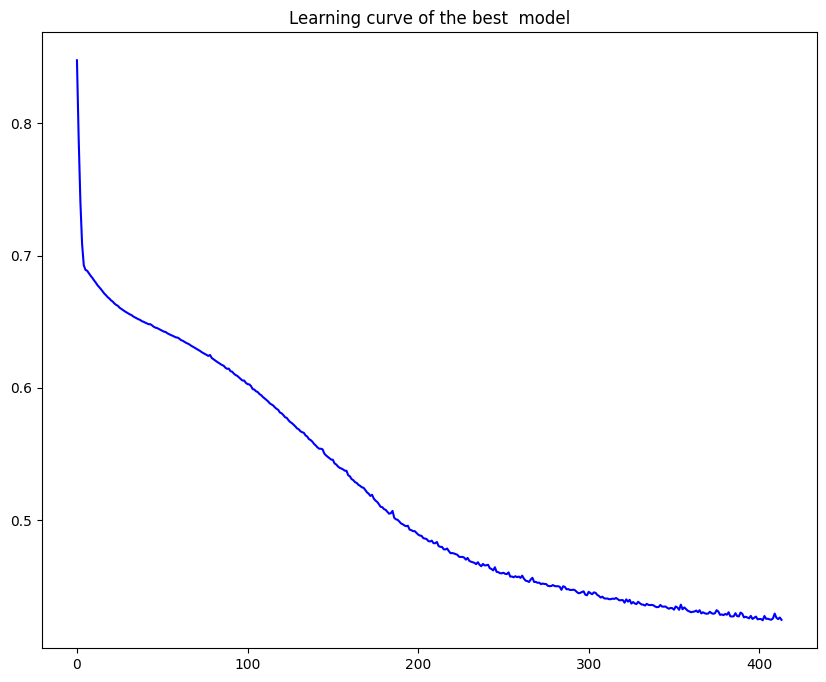

In [12]:
# YOUR CODE HERE
# raise NotImplementedError()
plt.figure(figsize=(10, 8))
plt.plot(best_model.loss_curve_, color='blue') #len(best_model.loss_curve_)?
plt.title('Learning curve of the best  model')
plt.show()